Machine Learning Methods used here:
1. Logistic Regression
2. Support Vector Machines**
3. Decision Tree
4. K Nearest Neighbors
5. Ensemble Methods(Random Forest, Adaboost, Gradient Boost)

За основу был взят ноутбук: https://www.kaggle.com/sanchitvj/sdss-dr16-data-analysis/notebook

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing Required Libraries and Reading Data

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls

%matplotlib inline

In [3]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [4]:
df = pd.read_csv('./input/Skyserver_SQL2_27_2018 6_51_39 PM.csv') #запущена другая выборка

In [5]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


# Exploratory Data Analysis

In [6]:
df.shape

(10000, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [8]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [9]:
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

There is no compelling reason to have a deep understanding of stars, system or quasars - yet we would already be able to advise which features are probably not going to be identified with the target variable 'class'. 

objid and specobjid are only identifiers for getting to the rows back when they were put away in the original databank. Along these lines we won't need them for classification as they are not identified with the result. 

Significantly more: The features 'run', 'rerun', 'camcol' and 'field' are values which describe portions of the camera right when mentioning the objective fact, for example 'run' speaks to the comparing check which caught the oject.

We'll drop these features.

In [10]:
df.drop(['run', 'rerun', 'camcol', 'field', 'objid', 'specobjid', 'fiberid'], axis = 1, inplace= True)
df.head(3)

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009,3306,54922
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055,323,51615
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111,287,52023


In [11]:
df.isnull().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
class       0
redshift    0
plate       0
mjd         0
dtype: int64

# Data Visualization

/home/nadia/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='class', ylabel='count'>

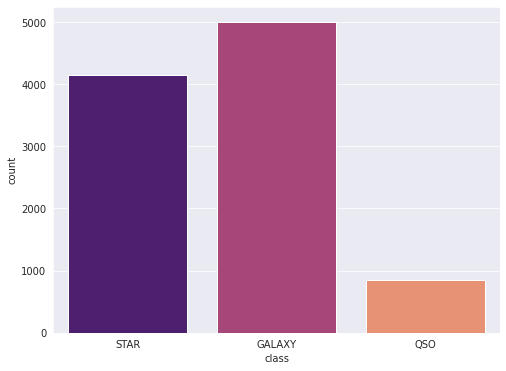

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize = (8, 6))
sns.countplot(df['class'], palette = 'magma')

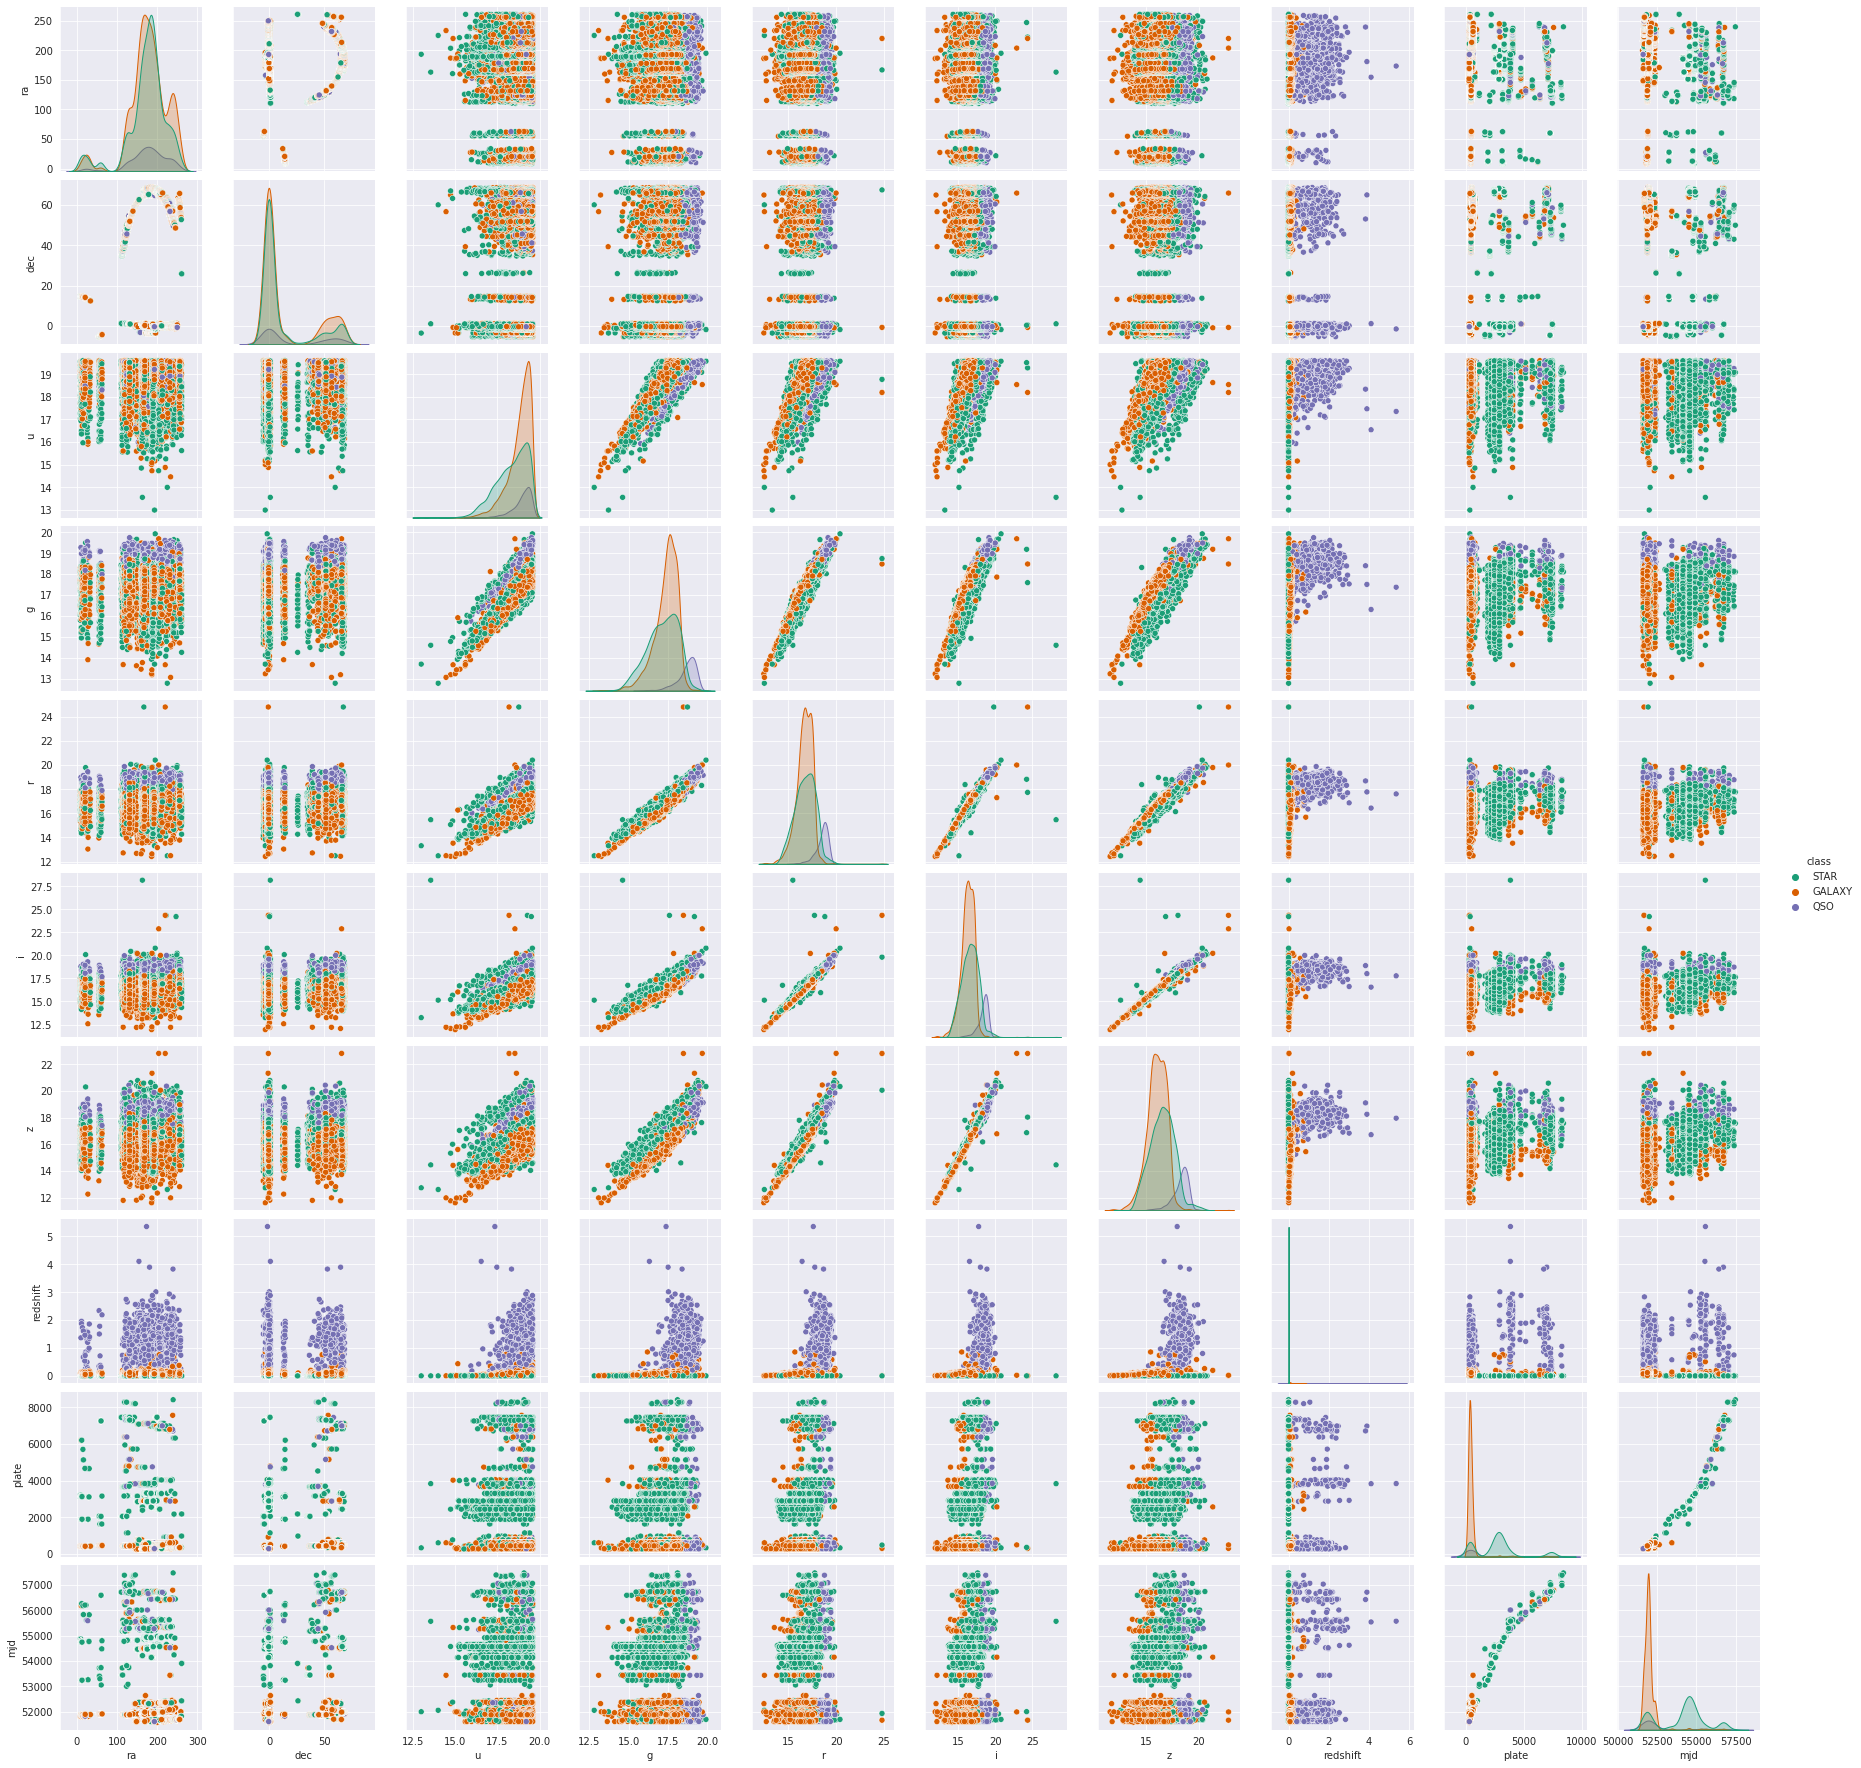

In [13]:
sns.pairplot(data = df, palette = 'Dark2', hue = 'class')

Using Boxplot to get a picture about outliers

<AxesSubplot:xlabel='class', ylabel='mjd'>

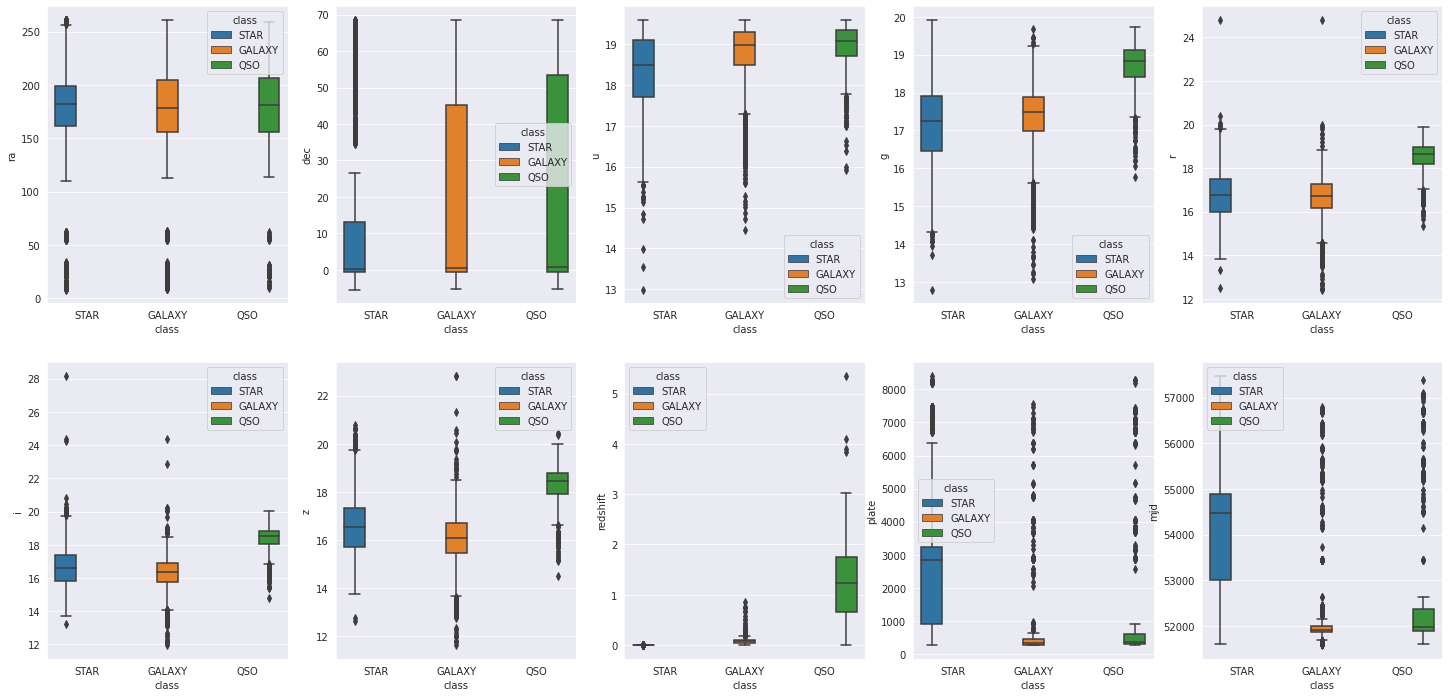

In [14]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(nrows=2, ncols=5, figsize = (25, 12))
sns.boxplot(ax=ax1, x = 'class', y = 'ra', hue = 'class', data = df)
sns.boxplot(ax=ax2, x = 'class', y = 'dec', hue = 'class', data = df)
sns.boxplot(ax=ax3, x = 'class', y = 'u', hue = 'class', data = df)
sns.boxplot(ax=ax4, x = 'class', y = 'g', hue = 'class', data = df)
sns.boxplot(ax=ax5, x = 'class', y = 'r', hue = 'class', data = df)
sns.boxplot(ax=ax6, x = 'class', y = 'i', hue = 'class', data = df)
sns.boxplot(ax=ax7, x = 'class', y = 'z', hue = 'class', data = df)
sns.boxplot(ax=ax8, x = 'class', y = 'redshift', hue = 'class', data = df)
sns.boxplot(ax=ax9, x = 'class', y = 'plate', hue = 'class', data = df)
sns.boxplot(ax=ax10, x = 'class', y = 'mjd', hue = 'class', data = df)

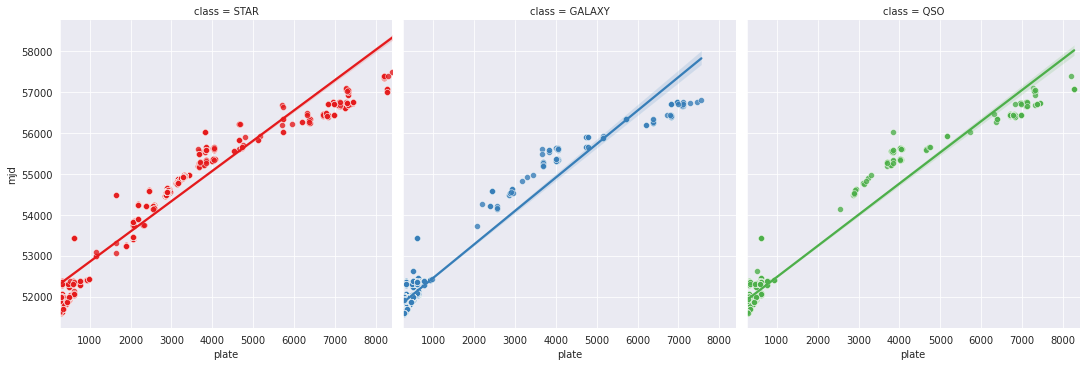

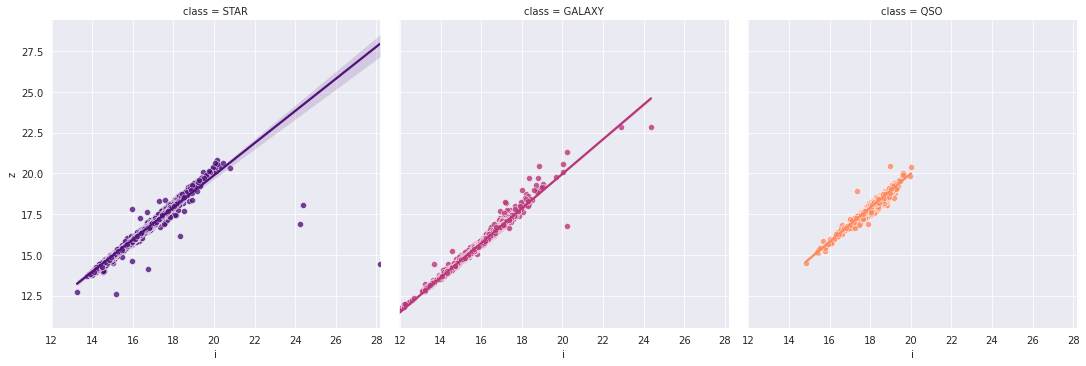

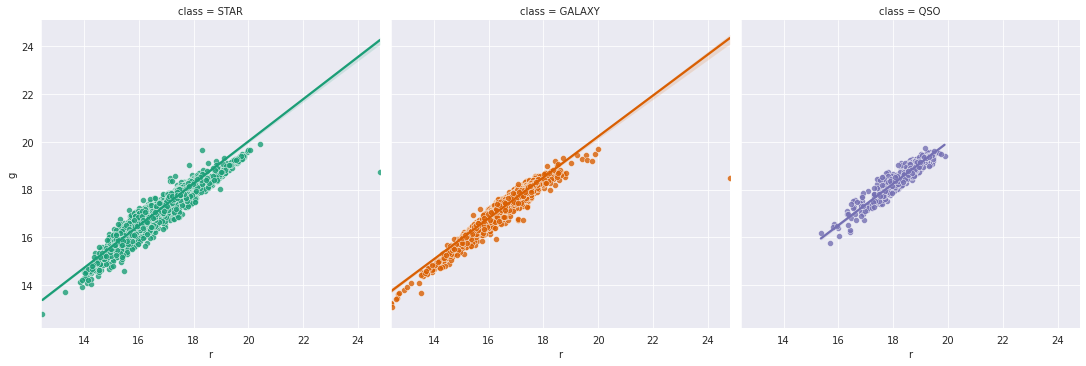

In [15]:
sns.lmplot(x = 'plate', y='mjd', data = df, hue='class', col = 'class', palette='Set1', scatter_kws= {'edgecolor':'white', 'alpha':0.8, 'linewidths': 0.5})
sns.lmplot(x = 'i', y='z', data = df, hue='class', col = 'class', palette='magma', scatter_kws= {'edgecolor':'white', 'alpha':0.8, 'linewidths': 0.5})
sns.lmplot(x = 'r', y='g', data = df, hue='class', col = 'class', palette='Dark2', scatter_kws= {'edgecolor':'white', 'alpha':0.8, 'linewidths': 0.5})

The redshift can be an estimate(!) for the distance from the earth to a object in space.

/home/nadia/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/nadia/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/nadia/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='redshift', ylabel='Density'>

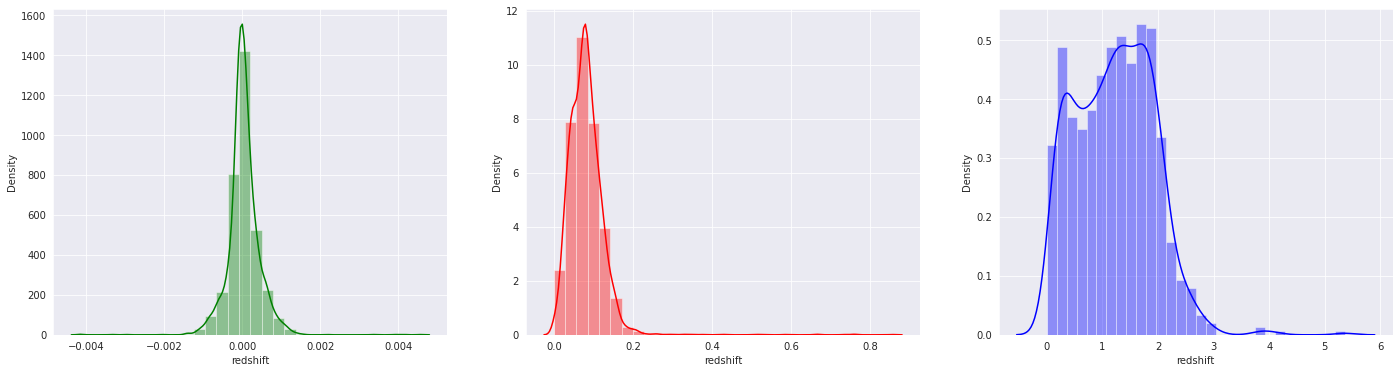

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (24, 6))
sns.distplot(df[df['class'] == 'STAR'].redshift, ax = ax1, bins = 30, color = 'g')
sns.distplot(df[df['class'] == 'GALAXY'].redshift, ax = ax2, bins = 30, color = 'r')
sns.distplot(df[df['class'] == 'QSO'].redshift, ax = ax3, bins = 30, color = 'b')

In [17]:
df.var()

ra          2.283257e+03
dec         6.356554e+02
u           6.866708e-01
g           8.938893e-01
r           1.140121e+00
i           1.303718e+00
z           1.447661e+00
redshift    1.511453e-01
plate       3.199728e+06
mjd         2.283576e+06
dtype: float64

Correlation using heatmap

<AxesSubplot:>

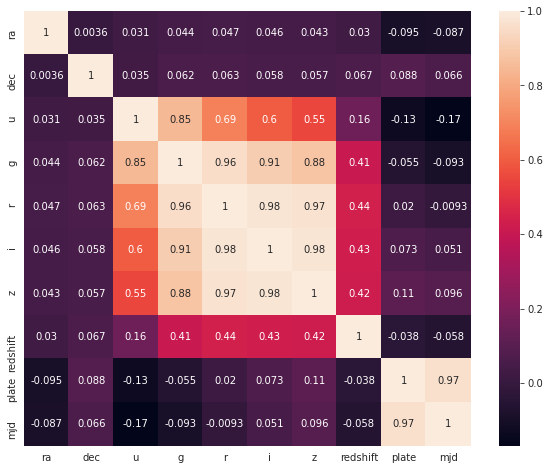

In [18]:
corr = df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True)

# Feature Engineering

Encoding Class labels to integers

In [19]:
df1 = df.copy()
labels = {'STAR':1, 'GALAXY':2, 'QSO':3}
df.replace({'class':labels}, inplace = True)
df.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,1,-0.000009,3306,54922
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,1,-0.000055,323,51615
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,2,0.123111,287,52023
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,1,-0.000111,3306,54922
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,1,0.000590,3306,54922


В оригинальной тетрадке была отмечена зависимость признаков u, g, r, i, z (в этом можно убедиться на графиках выше), поэтому было осуществлено сжатие данных признаков с помощью PCA. Я этого делать не буду, т.к. хочу получить зависимость точности классификации STAR конкретно от признака r (звездной величины).

In [20]:
df = df.sort_values(by='r')

Data separation into features and labels

In [21]:
X = df.drop('class', axis = 1).values
y = df['class'].values

Splitting data into train and test set

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

Because of presence of outliers we will be using RobustScaler to perform scaling on the data. For more about it look here:
https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf

In [23]:
robust = RobustScaler()
X_train = robust.fit_transform(X_train)
X_test = robust.transform(X_test)
X = robust.fit_transform(X)

In [24]:
#переменные для разделения выборки по признаку r:
n = 10
m = df['r'].min()
N = (df['r'].max() - m) / n

def print_plot(ml): #функция построения графика зависимости метрик классификации от r
    
    precision = []
    recall = []
    f1 = []
    r_mean = []
    y_pred_all = ml.predict(X)

    for i in range(0, n):
        indx = (df['r'] >= (m + N * i)) & (df['r'] <= (m + N * (i + 1))) #создаем выборку с необходимым нам диапазоном r
        if len(y[indx]) > 100 and df[indx & df['class'] == 1].shape[0] > 10:    #не будем брать слишком маленькие выборки
            h = classification_report(y[indx], y_pred_all[indx], output_dict=True, zero_division=0)
            precision.append(h['1']['precision'])
            recall.append(h['1']['recall'])
            f1.append(h['1']['f1-score'])
            r_mean.append(df['r'][indx].mean())
            
    plt.figure(figsize = (5,4))
    plt.title('Зависимость precision от признкака r:')
    plt.plot(r_mean, precision, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.figure(figsize = (5,4))
    plt.title('Зависимость recall от признкака r:')
    plt.plot(r_mean, recall, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.figure(figsize = (5,4))
    plt.title('Зависимость f1 от признкака r:')
    plt.plot(r_mean, f1, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    indx = df['r'] < 15
    return classification_report(y[indx], y_pred_all[indx], output_dict=True, zero_division=0)['1']['precision']

# Time to Train

Logistic Regression 

In [25]:
lr = LogisticRegression(max_iter=120)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
lr_train_acc = lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99      1255
           2       0.99      0.98      0.99      1499
           3       0.97      0.93      0.95       246

    accuracy                           0.99      3000
   macro avg       0.98      0.97      0.98      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix: 
 [[1255    0    0]
 [  21 1471    7]
 [   0   16  230]]
Training Score:  0.9857142857142858
Testing Score:  0.9853333333333333


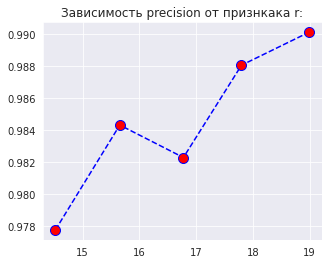

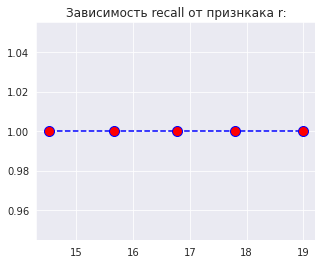

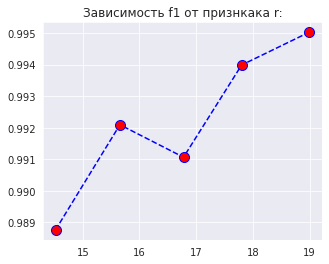

In [26]:
lr_test_acc = print_plot(lr)

Support Vector Classification

In [27]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
svc_train_acc = svc.score(X_train, y_train)
print('Training Score: ', svc_train_acc)
svc_test_acc = svc.score(X_test, y_test)
print('Testing Score: ', svc_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99      1255
           2       0.99      0.97      0.98      1499
           3       0.96      0.91      0.94       246

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000

Confusion Matrix: 
 [[1254    0    1]
 [  30 1460    9]
 [   0   21  225]]
Training Score:  0.9828571428571429
Testing Score:  0.9796666666666667


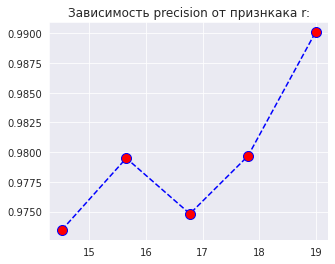

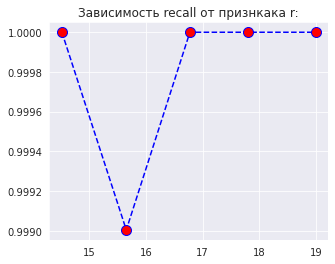

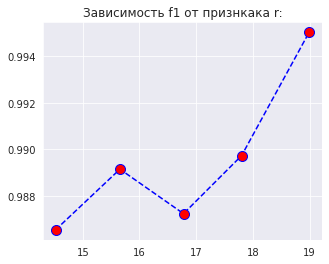

In [28]:
svc_test_acc = print_plot(svc)

Decision Tree Classifier

In [29]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
dt_train_acc = dt.score(X_train, y_train)
print('Training Score: ', dt_train_acc)
dt_test_acc = dt.score(X_test, y_test)
print('Testing Score: ', dt_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1255
           2       0.99      0.98      0.98      1499
           3       0.91      0.93      0.92       246

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.99      0.98      0.99      3000

Confusion Matrix: 
 [[1250    5    0]
 [   2 1475   22]
 [   0   16  230]]
Training Score:  1.0
Testing Score:  0.985


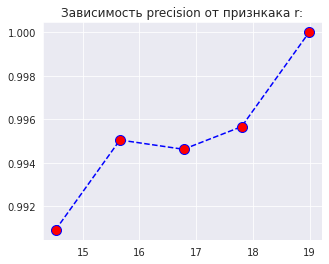

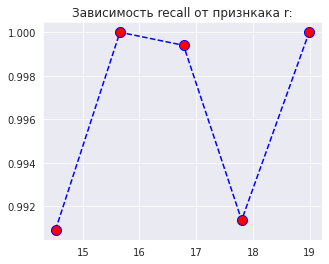

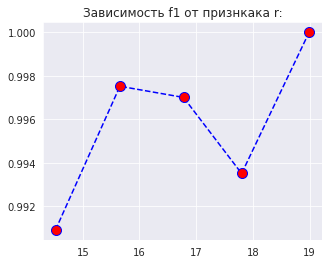

In [30]:
dt_test_acc = print_plot(dt)

Ensemble Methods

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
rf_train_acc = rf.score(X_train, y_train)
print('Training Score: ', rf_train_acc)
rf_test_acc = rf.score(X_test, y_test)
print('Testing Score: ', rf_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1255
           2       0.98      0.99      0.99      1499
           3       0.97      0.92      0.94       246

    accuracy                           0.99      3000
   macro avg       0.98      0.97      0.98      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix: 
 [[1251    4    0]
 [   5 1486    8]
 [   0   19  227]]
Training Score:  1.0
Testing Score:  0.988


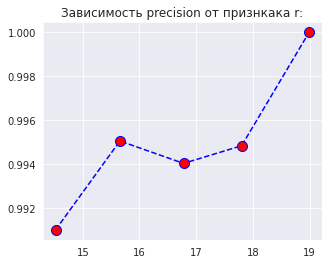

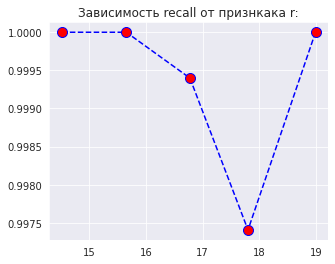

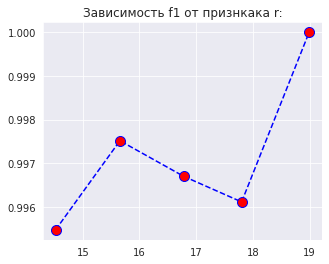

In [32]:
rf_test_acc = print_plot(rf)

In [33]:
adb = AdaBoostClassifier(rf)
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
adb_train_acc = adb.score(X_train, y_train)
print('Training Score: ', adb_train_acc)
adb_test_acc = adb.score(X_test, y_test)
print('Testing Score: ', adb_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1255
           2       0.99      0.99      0.99      1499
           3       0.96      0.93      0.95       246

    accuracy                           0.99      3000
   macro avg       0.98      0.97      0.98      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix: 
 [[1251    4    0]
 [   5 1485    9]
 [   0   16  230]]
Training Score:  1.0
Testing Score:  0.9886666666666667


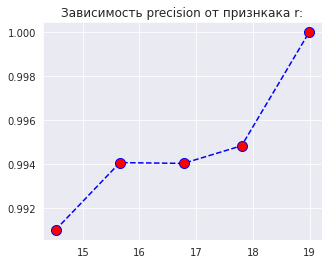

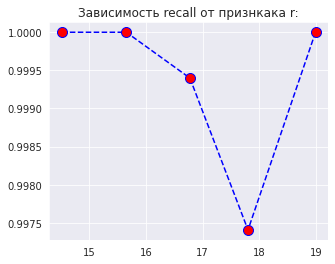

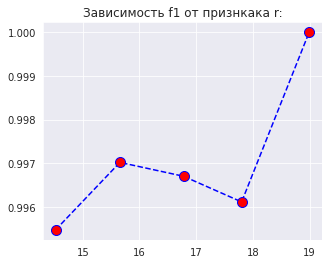

In [34]:
adb_test_acc = print_plot(adb)

In [35]:
gdb = GradientBoostingClassifier()
gdb.fit(X_train, y_train)
y_pred = adb.predict(X_test)
print('Classification Report: \n0', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
gdb_train_acc = gdb.score(X_train, y_train)
print('Training Score: ', gdb_train_acc)
gdb_test_acc = gdb.score(X_test, y_test)
print('Testing Score: ', gdb_test_acc)

Classification Report: 
0               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1255
           2       0.99      0.99      0.99      1499
           3       0.96      0.93      0.95       246

    accuracy                           0.99      3000
   macro avg       0.98      0.97      0.98      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix: 
 [[1251    4    0]
 [   5 1485    9]
 [   0   16  230]]
Training Score:  0.9992857142857143
Testing Score:  0.9866666666666667


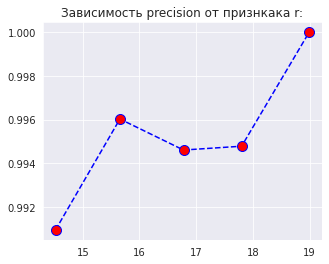

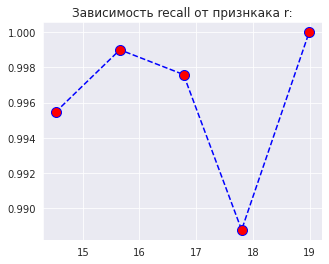

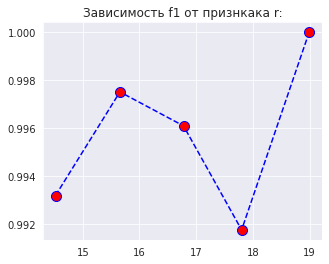

In [36]:
gdb_test_acc = print_plot(gdb)

K Nearest Neighbors Classification

In [37]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Plotting error rate vs. number of neighbors

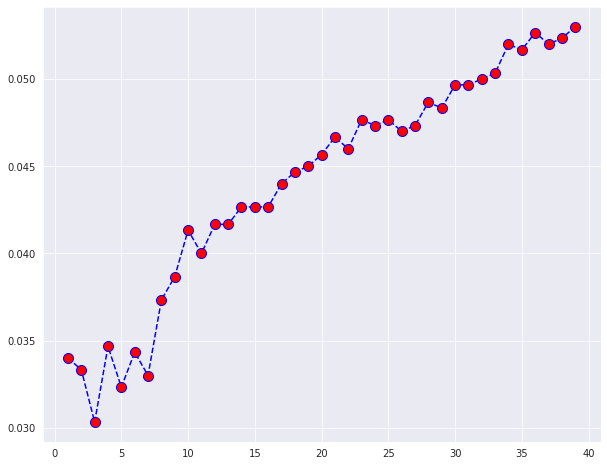

In [38]:
plt.figure(figsize = (10,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
knn_train_acc = knn.score(X_train, y_train)
print('Training Score: ', knn_train_acc)
knn_test_acc = knn.score(X_test, y_test)
print('Testing Score: ', knn_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97      1255
           2       0.97      0.96      0.97      1499
           3       0.96      0.92      0.94       246

    accuracy                           0.97      3000
   macro avg       0.96      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000

Confusion Matrix: 
 [[1231   24    0]
 [  43 1446   10]
 [   2   18  226]]
Training Score:  0.9777142857142858
Testing Score:  0.9676666666666667


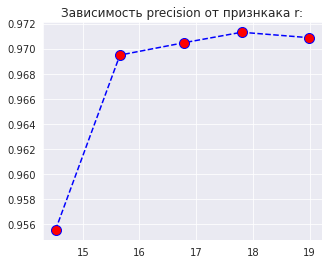

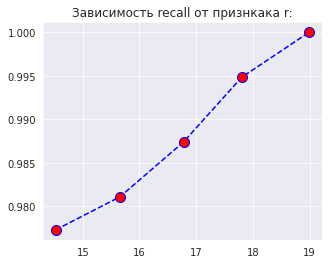

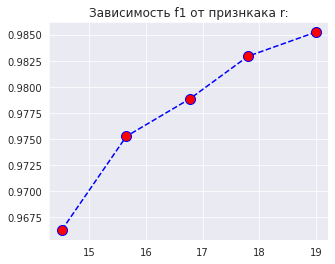

In [40]:
knn_test_acc = print_plot(knn)

In [41]:
print([df['r'].min(), df['r'].max()]) #интервал значений r

[12.4316, 24.802039999999998]


Проверка точности была проведена не для всех интерваллов r, из-за осутсвия достаточного кол-ва данных о них. Но заметим сходство для графиков precision от признкака r. Наименьшую точность классификаторы показывают для r < 15. 
Сравним показатели precision при r < 15 для разных классификаторов.

In [42]:
trace1 = go.Bar(
    x=['Logistic Regression','SVC','Decision Tree','Random Forest','AdaBoost','Gradient Boosting','KNN'],
    y=[lr_test_acc,svc_test_acc,dt_test_acc,rf_test_acc,adb_test_acc,gdb_test_acc,knn_test_acc],
    name = 'Accuracy Comparisons of the 4 algorithms',
        marker=dict(
                
    ),
)

layout = go.Layout(
    title='Precision классификации звезд с r < 15'
)

data = [trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Ratio")

Так же стоит отметить "провисание" precision в интервале 16 < r < 18. Это можно объяснить тем, что такие значения r характерны как для звезд, так и для галактик:

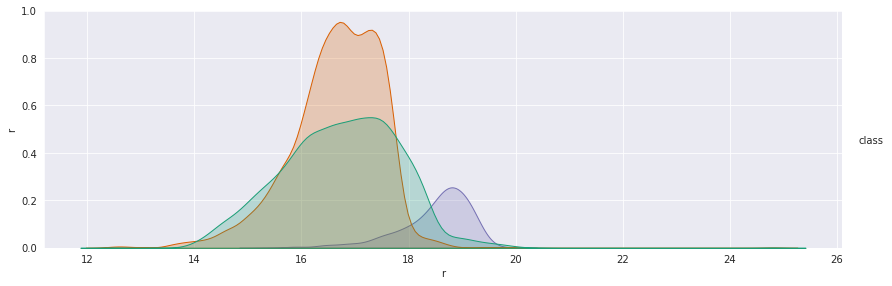

In [43]:
sns.pairplot(data = df1, palette = 'Dark2', vars='r', hue = 'class', height=4, aspect=3)